In [1]:
from utils_v1 import *


In [2]:
from icecream import ic

import numpy as np
from src.dataset import (
    MultipleDates,
    PA, PADeforestationTime, PADistanceMap, PAMultipleDates,
    MTDeforestationTime,
    MTMultipleDates
)

# from src.dataset_legacy import MTDeforestationTime
from src import training_generator as generator
from src.patchesHandler import PatchesHandler, PatchesHandlerMultipleDates, PatchesHandlerEvidential

from src.trainer.multioutput import TrainerEnsemble

from mpl_toolkits.axes_grid1 import make_axes_locatable

import cv2
from src import metrics as _metric


In [3]:

uncertaintyMethod = "pred_entropy"
config = {
	"training": False,
	"save_probabilities": False,
	"loadInference": False,
	"addPastDeforestationInput": True,
	"inference_times": 10,
	"removePolygons": True,
	"uncertainty_method": uncertaintyMethod
}
'''
if config["training"] == True:
	dates = [2017, 2018]
else:
	dates = [2018, 2019]
if config["training"] == True:
	dates = [2018, 2019]
else:
	dates = [2019, 2020]
'''
# dates = [2018, 2019]
# ic(dates)
# dataset = PAMultipleDates(dates = dates, # dates = [2017, 2018, 2019]. [2018, 2019]. [2015, 2016, 2017, 2018]
# 	addPastDeforestationInput = config['addPastDeforestationInput'],
# 	borderBuffer = 2)	
# exp_ids = [103, 104, 105, 106, 107, 118, 119, 120, 121, 122] # same date
# exp_ids = [123, 124, 125, 126, 127, 128, 129, 131, 1122, 1121] # earlier date
dates = [2019, 2020]
dataset = MTMultipleDates(dates = dates, # dates = [2016,2017,2018,2019]
	addPastDeforestationInput = config['addPastDeforestationInput'],
	borderBuffer = 2)	
exp_ids = [108, 109, 110, 111, 112, 113, 114, 115, 116, 117] # same date
# exp_ids = [130, 132, 133, 134, 135, 136, 137, 1125, 1124, 1123] # earlier date

if issubclass(type(dataset), MultipleDates):
	patchesHandler = PatchesHandlerMultipleDates(
		dataset)
else:
	patchesHandler = PatchesHandler()



ic| list(self.date_ids): [0]
ic| self.image_channels: [[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]]
ic| self.input_image_shape: 21
ic| self.dataset.image_channels: [[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]]


In [4]:
from tqdm import tqdm

# 

results_for_exps = []


trainer = TrainerEnsemble(config, dataset, patchesHandler)

trainer.defineExperiment(exp_ids)

# trainer.createLogFolders()

trainer.loadDataset()

# %%
if config["training"] == True:
    trainer.run()

# %%
results = trainer.run_predictor_repetition(uncertainty_methods=['pred_entropy'])


D:/Jorge/datasets/deforestation/MT/deforestation_past_years.tif
Loaded deforestation past years


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([161124576,   1332784,    240796,    338545,    313901,    287191,
                                                                       708581,    648966,    876898,   1007787,   1098901,   1054092,
                                                                      2096062,   2473828,   1400992], dtype=int64))


Label where deforestation past years is actual date (2020) = 1


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([161124576,   1332784,    240796,    338545,    313901,    287191,
                                                                       708581,    648966,    876898,   1007787,   1098901,   1054092,
                                                                      2096062,   2473828,   1400992], dtype=int64))


Past deforestation different from 0 (no deforestation)


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([161124576,   1332784,    240796,    338545,    313901,    287191,
                                                                       708581,    648966,    876898,   1007787,   1098901,   1054092,
                                                                      2096062,   2473828,   1400992], dtype=int64))


Past deforestation before 2008 is 2
D:/Jorge/datasets/deforestation/MT/deforestation_before_2008/deforestation_before_2008_MT.tif


ic| np.unique(label_past_deforestation_before_2008, return_counts=True): (array([  0, 215], dtype=uint8), array([122623260,  52380640], dtype=int64))
ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([161124576,   1332784,    240796,    338545,    313901,    287191,
                                                                       708581,    648966,    876898,   1007787,   1098901,   1054092,
                                                                      2096062,   2473828,   1400992], dtype=int64))
ic| label_per_date.shape: (16795, 10420, 1)


Mask label shape:  
 (16795, 10420, 1) 
 Unique values:  
 [0 1 2]
Tiles size:  3359 2084
Mask size:  (16795, 10420)


ic| image_stack.shape: (16795, 10420, 21)


Image shape:  (16795, 10420, 21)
mask:  (16795, 10420)
image stack:  (16795, 10420, 21)
ref : (16795, 10420, 1)
Training tiles:  [2, 4, 5, 6, 7, 12, 14, 15, 18, 21, 23, 24]
Validation tiles:  [9, 11, 25]
Test tiles:  [1, 3, 8, 10, 13, 16, 17, 19, 20, 22]
-5.0 -12.0
time:  0
time:  1
time:  2
time:  3
time:  4
time:  5
time:  6
time:  7
time:  8
time:  9
(44657480,)
(array([0, 1], dtype=uint8), array([43783238,   874242], dtype=int64))
(16795, 10420)
(array([0., 1.], dtype=float32), array([172681153,   2322747], dtype=int64))


ic| self.predicted_unpad.shape: (16795, 10420)
    self.predicted.shape: (16795, 10420)
ic| predicted_test.shape: (70001560,)
ic| predicted_test.shape: (44657480,)
ic| np.unique(predicted, return_counts=True): (array([0., 1.], dtype=float32), array([172681153,   2322747], dtype=int64))
    np.unique(predicted_larger_than_min_area, return_counts=True): (array([0., 1.], dtype=float32), array([172776032,   2227868], dtype=int64))
ic| np.unique(ignored_polygons, return_counts=True): (array([0., 1.], dtype=float32), array([174909021,     94879], dtype=int64))
ic| predicted.shape: (16795, 10420), label_mask.shape: (16795, 10420)
ic| predicted_masked.shape: (70001560,)
    label_masked.shape: (70001560,)
ic| np.unique(label_masked, return_counts=True): (array([0, 1, 2], dtype=uint8),
                                                  array([43761894,   861512, 25378154], dtype=int64))
ic| predicted_masked.shape: (44623406,)
    label_masked.shape: (44623406,)
ic| self.f1: 81.37, self.precision

(array([0., 1.], dtype=float32), array([174491508,    512392], dtype=int64))


ic| self.label_mask.shape: (16795, 10420)
ic| self.mask_amazon_ts.shape: (16795, 10420)
ic| self.label_mask_test.shape: (70001560,)
ic| self.error_mask_test.shape: (44623406,)
ic| bounds: (0.0015, 0.3663794801235199)
c:\Users\jchamorro\Anaconda3\envs\tf2\lib\site-packages\scipy\optimize\_minimize.py:783: RuntimeWarning: Method 'bounded' does not support relative tolerance in x; defaulting to absolute tolerance.
  warn("Method 'bounded' does not support relative tolerance in x; "


0.1408715596097929
threshold 0.1408715596097929
(43415070,) (43415070,)


ic| label_current_deforestation_test_classified_incorrect.shape: (1208336,)
    predicted_test_classified_incorrect.shape: (1208336,)
ic| TP_H + FN_H + FP_H + TN_H: 1208336
    len(label_mask_current_deforestation_test): 44623406
ic| TP_H + FN_H + FP_H + TN_H: 1208336
    len(label_mask_current_deforestation_test): 44623406


cm_correct [[42851162    51888]
 [   19274   492746]]
cm_incorrect [[752938 105906]
 [143033 206459]]
[0.90472868 0.96235694 0.57195489 0.02707852 0.66095433 0.59074027]
0.22700792051372695
threshold 0.22700792051372695
(43800067,) (43800067,)


ic| label_current_deforestation_test_classified_incorrect.shape: (823339,)
    predicted_test_classified_incorrect.shape: (823339,)
ic| TP_H + FN_H + FP_H + TN_H: 823339
    len(label_mask_current_deforestation_test): 44623406
ic| TP_H + FN_H + FP_H + TN_H: 823339
    len(label_mask_current_deforestation_test): 44623406


cm_correct [[43116648    87078]
 [   27446   568895]]
cm_incorrect [[487452  70716]
 [134861 130310]]
[0.86725368 0.953976   0.66034484 0.01845083 0.64822461 0.49141874]
0.08763636090393405
threshold 0.08763636090393405
(43087179,) (43087179,)


ic| label_current_deforestation_test_classified_incorrect.shape: (1536227,)
    predicted_test_classified_incorrect.shape: (1536227,)
ic

cm_correct [[42599319    32748]
 [   15427   439685]]
cm_incorrect [[1004781  125046]
 [ 146880  259520]]


| TP_H + FN_H + FP_H + TN_H: 1536227
    len(label_mask_current_deforestation_test): 44623406
ic| TP_H + FN_H + FP_H + TN_H: 1536227
    len(label_mask_current_deforestation_test): 44623406


[0.93068223 0.96610285 0.51036434 0.03442648 0.67483865 0.63858268]
0.12959320695993043
threshold 0.12959320695993043
(43355493,) (43355493,)


ic| label_current_deforestation_test_classified_incorrect.shape: (1267913,)
    predicted_test_classified_incorrect.shape: (1267913,)
ic| TP_H + FN_H + FP_H + TN_H: 1267913
    len(label_mask_current_deforestation_test): 44623406
ic| TP_H + FN_H + FP_H + TN_H: 1267913
    len(label_mask_current_deforestation_test): 44623406


cm_correct [[42807635    47020]
 [   18378   482460]]
cm_incorrect [[796465 110774]
 [143929 216745]]
[0.91119589 0.9633055  0.56001541 0.02841363 0.6617784  0.60094434]
0.11829818057650533
threshold 0.11829818057650533
(43290529,) (43290529,)


ic| label_current_deforestation_test_classified_incorrect.shape: (1332877,)
    predicted_test_classified_incorrect.shape: (1332877,)
ic| TP_H + FN_H + FP_H + TN_H: 1332877
    len(label_mask_current_deforestation_test): 44623406
ic| TP_H + FN_H + FP_H + TN_H: 1332877
    

cm_correct [[42759893    42025]
 [   17534   471077]]
cm_incorrect [[844207 115769]
 [144773 228128]]


len(label_mask_current_deforestation_test): 44623406


[0.91809621 0.9641146  0.5468026  0.02986946 0.66336141 0.61176559]
0.10658640761850327
threshold 0.10658640761850327
(43218262,) (43218262,)


ic| label_current_deforestation_test_classified_incorrect.shape: (1405144,)
    predicted_test_classified_incorrect.shape: (1405144,)
ic| TP_H + FN_H + FP_H + TN_H: 1405144
    

cm_correct [[42704829    37779]
 [   16744   458910]]
cm_incorrect [[899271 120015]
 [145563 240295]]


len(label_mask_current_deforestation_test): 44623406
ic| TP_H + FN_H + FP_H + TN_H: 1405144
    len(label_mask_current_deforestation_test): 44623406


[0.92393832 0.96479794 0.53267975 0.03148895 0.66691183 0.622755  ]
0.11789088458555358
threshold 0.11789088458555358
(43288113,) (43288113,)


ic| label_current_deforestation_test_classified_incorrect.shape: (1335293,)
    predicted_test_classified_incorrect.shape: (1335293,)
ic| TP_H + FN_H + FP_H + TN_H: 1335293
    len(label_mask_current_deforestation_test): 44623406
ic| TP_H + FN_H + FP_H + TN_H: 1335293


cm_correct [[42758098    41869]
 [   17514   470632]]
cm_incorrect [[846002 115925]
 [144793 228573]]


    len(label_mask_current_deforestation_test): 44623406


[0.91830455 0.96412139 0.54628606 0.0299236  0.66349587 0.61219554]
0.11507603566068973
threshold 0.11507603566068973
(43271132,) (43271132,)


ic| label_current_deforestation_test_classified_incorrect.shape: (1352274,)
    predicted_test_classified_incorrect.shape: (1352274,)
ic| TP_H + FN_H + FP_H + TN_H: 1352274
    len(label_mask_current_deforestation_test): 44623406
ic| TP_H + FN_H + FP_H + TN_H: 1352274
    len(label_mask_current_deforestation_test

cm_correct [[42745401    40782]
 [   17323   467626]]
cm_incorrect [[858699 117012]
 [144984 231579]]


): 44623406


[0.9197849  0.96427872 0.54279685 0.03030414 0.66432868 0.61498076]
0.11681570796945169
threshold 0.11681570796945169
(43281756,) (43281756,)


ic| label_current_deforestation_test_classified_incorrect.shape: (1341650,)
    predicted_test_classified_incorrect.shape: (1341650,)
ic| TP_H + FN_H + FP_H + TN_H: 1341650
    len(label_mask_current_deforestation_test): 44623406
ic| TP_H + FN_H + FP_H + TN_H: 1341650
    len(label_mask_current_deforestation_test): 44623406


cm_correct [[42753338    41496]
 [   17448   469474]]
cm_incorrect [[850762 116298]
 [144859 229731]]
[0.91878975 0.96416675 0.54494192 0.03006606 0.66390678 0.61328653]
0.11729549455493149
threshold 0.11729549455493149
(43284609,) (43284609,)


ic| label_current_deforestation_test_classified_incorrect.shape: (1338797,)
    predicted_test_classified_incorrect.shape: (1338797,)
ic| TP_H + FN_H + FP_H + TN_H: 1338797
    len(label_mask_current_deforestation_test): 44623406
ic| TP_H + FN_H + FP_H + TN_H: 1338797
    

cm_correct [[42755470    41662]
 [   17475   470002]]
cm_incorrect [[848630 116132]
 [144832 229203]]


len(label_mask_current_deforestation_test): 44623406


[0.91857547 0.96415215 0.54555479 0.03000212 0.66371205 0.6127849 ]
0.11733325996709824
threshold 0.11733325996709824
(43284843,) (43284843,)


ic| label_current_deforestation_test_classified_incorrect.shape: (1338563,)
    predicted_test_classified_incorrect.shape: (1338563,)
ic| TP_H + FN_H + FP_H + TN_H: 1338563
    len(label_mask_current_deforestation_test): 44623406
ic| TP_H + FN_H + FP_H + TN_H: 1338563
    len(label_mask_current_deforestation_test): 44623406


cm_correct [[42755648    41678]
 [   17478   470039]]
cm_incorrect [[848452 116116]
 [144829 229166]]
[0.91855264 0.96414894 0.54559774 0.02999688 0.66370677 0.61275151]
0.11726215948182482
threshold 0.11726215948182482
(43284400,) (43284400,)


ic| label_current_deforestation_test_classified_incorrect.shape: (1339006,)
    predicted_test_classified_incorrect.shape: (1339006,)
ic| TP_H + FN_H + FP_H + TN_H: 1339006
    len(label_mask_current_deforestation_test): 44623406
ic| TP_H + FN_H + FP_H + TN_H: 1339006
    len

cm_correct [[42755302    41652]
 [   17473   469973]]
cm_incorrect [[848798 116142]
 [144834 229232]]


(label_mask_current_deforestation_test): 44623406
ic| self.threshold_optimal: 0.11729549455493149


[0.91858881 0.96415398 0.54552113 0.03000681 0.66372107 0.61281164]
threshold 0.11729549455493149
(43284609,) (43284609,)


ic| label_current_deforestation_test_classified_incorrect.shape: (1338797,)
    predicted_test_classified_incorrect.shape: (1338797,)
ic| TP_H + FN_H + FP_H + TN_H: 1338797
    len(label_mask_current_deforestation_test): 44623406
ic| TP_H + FN_H + FP_H + 

cm_correct [[42755470    41662]
 [   17475   470002]]
cm_incorrect [[848630 116132]
 [144832 229203]]


TN_H: 1338797
    len(label_mask_current_deforestation_test): 44623406


[0.91857547 0.96415215 0.54555479 0.03000212 0.66371205 0.6127849 ]
threshold 0.11729549455493149
(44623406,) (44623406,)


ic| self.m_optimal: {'AA': array([0.03000212]),
                     'f1': 81.37,
                     'f1_H': array([0.63723258]),
                     'f1_L': array([0.94081216]),
                     'precision_H': array([0.66371205]),
                     'precision_L': array([0.91857547]),
                     'recall_H': array([0.6127849]),
                     'recall_L': array([0.96415215]),
                     'recall_Ltotal': array([0.54555479])}
ic| self.m_audited_optimal: {'f1': array([0.96615349]),
                             'precision': array([0.95296145]),
                             'recall': array([0.97971589])}


cm_audited [[43720232    41662]
 [   17475   844037]]
[0.95296145 0.97971589]
results {'pred_entropy': {'metrics': {'precision_L': array([0.91857547]), 'recall_L': array([0.96415215]), 'recall_Ltotal': array([0.54555479]), 'AA': array([0.03000212]), 'precision_H': array([0.66371205]), 'recall_H': array([0.6127849]), 'f1_L': array([0.94081216]), 'f1_H': array([0.63723258]), 'f1': 81.37}, 'metrics_audited': {'precision': array([0.95296145]), 'recall': array([0.97971589]), 'f1': array([0.96615349])}}}


In [5]:
print(results)

{'pred_entropy': {'metrics': {'precision_L': array([0.91857547]), 'recall_L': array([0.96415215]), 'recall_Ltotal': array([0.54555479]), 'AA': array([0.03000212]), 'precision_H': array([0.66371205]), 'recall_H': array([0.6127849]), 'f1_L': array([0.94081216]), 'f1_H': array([0.63723258]), 'f1': 81.37}, 'metrics_audited': {'precision': array([0.95296145]), 'recall': array([0.97971589]), 'f1': array([0.96615349])}}}


In [6]:
'''
print(results['pred_entropy_single_0'])
print(results['pred_entropy_single_1'])
print(results['pred_entropy_single_2'])
print(results['pred_entropy_single_3'])
print(results['pred_entropy_single_4'])
print(results['pred_entropy_single_5'])
print(results['pred_entropy_single_6'])
print(results['pred_entropy_single_7'])
print(results['pred_entropy_single_8'])
print(results['pred_entropy_single_9'])
'''
# print(results_for_exps[0]['pred_entropy_single'])


"\nprint(results['pred_entropy_single_0'])\nprint(results['pred_entropy_single_1'])\nprint(results['pred_entropy_single_2'])\nprint(results['pred_entropy_single_3'])\nprint(results['pred_entropy_single_4'])\nprint(results['pred_entropy_single_5'])\nprint(results['pred_entropy_single_6'])\nprint(results['pred_entropy_single_7'])\nprint(results['pred_entropy_single_8'])\nprint(results['pred_entropy_single_9'])\n"

In [7]:
trainer.setPlotLimsForUncertaintyAA()

In [8]:
trainer.getUncertaintyAAValues()

ic| self.uncertainty.shape: (44623406,)
    self.label_mask_current_deforestation_test.shape: (44623406,)


[0.0025, 0.005, 0.0075, 0.01, 0.015, 0.025, 0.05, 0.08, 0.1, 0.15, 0.2, 0.225, 0.25, 0.27, 0.3, 0.34, 0.36, 0.3648794801235199, 0.3663794801235199]
threshold 0.0025
(40358512,) (40358512,)


ic| label_current_deforestation_test_classified_incorrect.shape: (4264894,)
    predicted_test_classified_incorrect.shape: (4264894,)


cm_correct [[40067401     4722]
 [    1895   284494]]


ic| TP_H + FN_H + FP_H + TN_H: 4264894
    len(label_mask_current_deforestation_test): 44623406
ic| TP_H + FN_H + FP_H + TN_H: 4264894
    len(label_mask_current_deforestation_test): 44623406


cm_incorrect [[3536699  153072]
 [ 160412  414711]]
[0.9836731  0.99338313 0.33022639 0.09557527 0.73040405 0.72108227]
threshold 0.005
(40973428,) (40973428,)


ic| label_current_deforestation_test_classified_incorrect.shape: (3649978,)
    predicted_test_classified_incorrect.shape: (3649978,)


cm_correct [[40660863     5815]
 [    2968   303782]]


ic| TP_H + FN_H + FP_H + TN_H: 3649978
    len(label_mask_current_deforestation_test): 44623406
ic| TP_H + FN_H + FP_H + TN_H: 3649978
    len(label_mask_current_deforestation_test): 44623406


cm_incorrect [[2943237  151979]
 [ 159339  395423]]
[0.98121752 0.99032437 0.35261494 0.08179515 0.72236309 0.71277953]
threshold 0.0075
(41313264,) (41313264,)


ic| label_current_deforestation_test_classified_incorrect.shape: (3310142,)
    predicted_test_classified_incorrect.shape: (3310142,)


cm_correct [[40986123     7095]
 [    4264   315782]]


ic| TP_H + FN_H + FP_H + TN_H: 3310142
    len(label_mask_current_deforestation_test): 44623406
ic| TP_H + FN_H + FP_H + TN_H: 3310142
    len(label_mask_current_deforestation_test): 44623406


cm_incorrect [[2617977  150699]
 [ 158043  383423]]
[0.97802569 0.98667692 0.36654394 0.0741795  0.71785659 0.70812018]
threshold 0.01
(41548598,) (41548598,)


ic| label_current_deforestation_test_classified_incorrect.shape: (3074808,)
    predicted_test_classified_incorrect.shape: (3074808,)


cm_correct [[41210045     8005]
 [    5330   325218]]


ic| TP_H + FN_H + FP_H + TN_H: 3074808
    len(label_mask_current_deforestation_test): 44623406
ic| TP_H + FN_H + FP_H + TN_H: 3074808
    len(label_mask_current_deforestation_test): 44623406


cm_incorrect [[2394055  149789]
 [ 156977  373987]]
[0.97597705 0.98387526 0.37749677 0.06890572 0.71402088 0.70435472]
threshold 0.015
(41866628,) (41866628,)


ic| label_current_deforestation_test_classified_incorrect.shape: (2756778,)
    predicted_test_classified_incorrect.shape: (2756778,)


cm_correct [[41509860    10294]
 [    6824   339650]]


ic| TP_H + FN_H + FP_H + TN_H: 2756778
    len(label_mask_current_deforestation_test): 44623406
ic| TP_H + FN_H + FP_H + TN_H: 2756778
    len(label_mask_current_deforestation_test): 44623406


cm_incorrect [[2094240  147500]
 [ 155483  359555]]
[0.97058386 0.98030444 0.39424872 0.06177874 0.70910454 0.69811354]
threshold 0.025
(42253434,) (42253434,)


ic| label_current_deforestation_test_classified_incorrect.shape: (2369972,)
    predicted_test_classified_incorrect.shape: (2369972,)


cm_correct [[41862952    19501]
 [    8884   362097]]


ic| TP_H + FN_H + FP_H + TN_H: 2369972
    len(label_mask_current_deforestation_test): 44623406
ic| TP_H + FN_H + FP_H + TN_H: 2369972
    len(label_mask_current_deforestation_test): 44623406


cm_incorrect [[1741148  138293]
 [ 153423  337108]]
[0.94889648 0.97605268 0.42030407 0.05311051 0.70910242 0.68723078]
threshold 0.05
(42726998,) (42726998,)


ic| label_current_deforestation_test_classified_incorrect.shape: (1896408,)
    predicted_test_classified_incorrect.shape: (1896408,)


cm_correct [[42287000    26307]
 [   12427   401264]]


ic| TP_H + FN_H + FP_H + TN_H: 1896408
    len(label_mask_current_deforestation_test): 44623406
ic| TP_H + FN_H + FP_H + TN_H: 1896408
    len(label_mask_current_deforestation_test): 44623406


cm_incorrect [[1317100  131487]
 [ 149880  297941]]
[0.93847338 0.96996067 0.46576716 0.04249806 0.69380897 0.6653127 ]
threshold 0.08
(43027604,) (43027604,)


ic| label_current_deforestation_test_classified_incorrect.shape: (1595802,)
    predicted_test_classified_incorrect.shape: (1595802,)
ic

cm_correct [[42549606    31259]
 [   14888   431851]]
cm_incorrect [[1054494  126535]
 [ 147419  267354]]


| TP_H + FN_H + FP_H + TN_H: 1595802
    len(label_mask_current_deforestation_test): 44623406
ic| TP_H + FN_H + FP_H + TN_H: 1595802
    len(label_mask_current_deforestation_test): 44623406


[0.932502   0.96667405 0.50127102 0.03576155 0.67875467 0.64457908]
threshold 0.1
(43174920,) (43174920,)


ic| label_current_deforestation_test_classified_incorrect.shape: (1448486,)
    predicted_test_classified_incorrect.shape: (1448486,)
ic| TP_H + FN_H + FP_H + TN_H: 1448486
    len(label_mask_current_deforestation_test): 44623406


cm_correct [[42670499    35779]
 [   16281   452361]]
cm_incorrect [[933601 122015]
 [146026 246844]]


ic| TP_H + FN_H + FP_H + TN_H: 1448486
    len(label_mask_current_deforestation_test): 44623406


[0.9267034  0.9652592  0.525078   0.03246023 0.66920964 0.62830962]
threshold 0.15
(43460299,) (43460299,)


ic| label_current_deforestation_test_classified_incorrect.shape: (1163107,)
    predicted_test_classified_incorrect.shape: (1163107,)
ic| TP_H + FN_H + FP_H + TN_H: 1163107
    len(label_mask_current_deforestation_test): 44623406
ic| TP_H + FN_H + FP_H + TN_H: 1163107
    len(label_mask_current_deforestation_test): 44623406


cm_correct [[42883764    55408]
 [   20007   501120]]
cm_incorrect [[720336 102386]
 [142300 198085]]
[0.90043987 0.96160821 0.58167501 0.02606495 0.65924831 0.58194398]
threshold 0.2
(43685780,) (43685780,)


ic| label_current_deforestation_test_classified_incorrect.shape: (937626,)
    predicted_test_classified_incorrect.shape: (937626,)
ic| TP_H + FN_H + FP_H + TN_H: 937626
    len(label_mask_current_deforestation_test): 44623406
ic| TP_H + FN_H + FP_H + TN_H: 937626
    len(label_mask_current_deforestation_test): 44623406


cm_correct [[43039840    75342]
 [   24477   546121]]
cm_incorrect [[564260  82452]
 [137830 153084]]
[0.87876672 0.9571029  0.63390992 0.02101198 0.64993886 0.52621737]
threshold 0.225
(43791434,) (43791434,)


ic| label_current_deforestation_test_classified_incorrect.shape: (831972,)
    predicted_test_classified_incorrect.shape: (831972,)
ic| TP_H + FN_H + FP_H + TN_H: 831972
    len(label_mask_current_deforestation_test): 44623406
ic| TP_H + FN_H + FP_H + TN_H: 831972
    len(label_mask_current_deforestation_test): 44623406


cm_correct [[43110716    86175]
 [   27206   567337]]
cm_incorrect [[493384  71619]
 [135101 131868]]
[0.86813555 0.95424048 0.65853639 0.0186443  0.6480414  0.49394499]
threshold 0.25
(43893784,) (43893784,)


ic| label_current_deforestation_test_classified_incorrect.shape: (729622,)
    predicted_test_classified_incorrect.shape: (729622,)
ic| TP_H + FN_H + FP_H + TN_H: 729622
    len(label_mask_current_deforestation_test): 44623406
ic| TP_H + FN_H + FP_H + TN_H: 729622
    len(label_mask_current_deforestation_test): 44623406


cm_correct [[43178711    97659]
 [   30179   587235]]
cm_incorrect [[425389  60135]
 [132128 111970]]
[0.85741005 0.95112032 0.68163299 0.01635066 0.65059121 0.45870921]
threshold 0.27
(43973341,) (43973341,)


ic| label_current_deforestation_test_classified_incorrect.shape: (650065,)
    predicted_test_classified_incorrect.shape: (650065,)
ic| TP_H + FN_H + FP_H + TN_H: 650065
    len(label_mask_current_deforestation_test): 44623406
ic| TP_H + FN_H + FP_H + TN_H: 650065
    len(label_mask_current_deforestation_test): 44623406


cm_correct [[43228160   107302]
 [   33033   604846]]
cm_incorrect [[375940  50492]
 [129274  94359]]
[0.84932626 0.94821432 0.70207496 0.0145678  0.65142112 0.42193683]
threshold 0.3
(44098401,) (44098401,)


ic| label_current_deforestation_test_classified_incorrect.shape: (525005,)
    predicted_test_classified_incorrect.shape: (525005,)
ic| TP_H + FN_H + FP_H + TN_H: 525005
    len(label_mask_current_deforestation_test): 44623406
ic| TP_H + FN_H + FP_H + TN_H: 525005
    len(label_mask_current_deforestation_test): 44623406


cm_correct [[43301990   123818]
 [   39144   633449]]
cm_incorrect [[302110  33976]
 [123163  65756]]
[0.8364936  0.94180136 0.73527589 0.01176524 0.659327   0.34806451]
threshold 0.34
(44301631,) (44301631,)


ic| label_current_deforestation_test_classified_incorrect.shape: (321775,)
    predicted_test_classified_incorrect.shape: (321775,)
ic| TP_H + FN_H + FP_H + TN_H: 321775
    len(label_mask_current_deforestation_test): 44623406
ic| TP_H + FN_H + FP_H + TN_H: 321775
    len(label_mask_current_deforestation_test): 44623406


cm_correct [[43407469   152496]
 [   53920   687746]]
cm_incorrect [[196631   5298]
 [108387  11459]]
[0.81850943 0.92729881 0.79830113 0.0072109  0.68383362 0.09561437]
threshold 0.36
(44462385,) (44462385,)


ic| label_current_deforestation_test_classified_incorrect.shape: (161021,)
    predicted_test_classified_incorrect.shape: (161021,)
d:\Jorge\deforestation_uncertainty\src\metrics.py:299: RuntimeWarning: invalid value encountered in longlong_scalars
  precision_H = TP_H / (TP_H + FP_H)
ic| TP_H + FN_H + FP_H + TN_H: 161021
    len(label_mask_current_deforestation_test): 44623406
ic| TP_H + FN_H + FP_H + TN_H: 161021
    len(label_mask_current_deforestation_test): 44623406


cm_correct [[43502483   157794]
 [  102903   699205]]
cm_incorrect [[101617      0]
 [ 59404      0]]
[0.8158761  0.8717093  0.81160216 0.00360844        nan 0.        ]
threshold 0.3648794801235199
(44526239,) (44526239,)


ic| label_current_deforestation_test_classified_incorrect.shape: (97167,)
    predicted_test_classified_incorrect.shape: (97167,)
d:\Jorge\deforestation_uncertainty\src\metrics.py:299: RuntimeWarning: invalid value encountered in longlong_scalars
  precision_H = TP_H / (TP_H + FP_H)
ic| TP_H + FN_H + FP_H + TN_H: 97167
    len(label_mask_current_deforestation_test): 44623406
ic| TP_H + FN_H + FP_H + TN_H: 97167
    len(label_mask_current_deforestation_test): 44623406


cm_correct [[43542776   157794]
 [  126464   699205]]
cm_incorrect [[61324     0]
 [35843     0]]
[0.8158761  0.84683451 0.81160216 0.00217749        nan 0.        ]
threshold 0.3663794801235199
(44555317,) (44555317,)


ic| label_current_deforestation_test_classified_incorrect.shape: (68089,)
    predicted_test_classified_incorrect.shape: (68089,)
d:\Jorge\deforestation_uncertainty\src\metrics.py:299: RuntimeWarning: invalid value encountered in longlong_scalars
  precision_H = TP_H / (TP_H + FP_H)
ic| TP_H + FN_H + FP_H + TN_H: 68089
    len(label_mask_current_deforestation_test): 44623406
ic| TP_H + FN_H + FP_H + TN_H: 68089
    len(label_mask_current_deforestation_test): 44623406


cm_correct [[43561039   157794]
 [  137279   699205]]
cm_incorrect [[43061     0]
 [25028     0]]
[0.8158761  0.83588568 0.81160216 0.00152586        nan 0.        ]


In [9]:
trainer.getUncertaintyAAAuditedValues()

ic| self.uncertainty.shape: (44623406,)
    self.label_mask_current_deforestation_test.shape: (44623406,)


threshold 0.0025
(44623406,) (44623406,)
cm_audited [[43757172     4722]
 [    1895   859617]]
[0.99453687 0.99780038]
threshold 0.005
(44623406,) (44623406,)
cm_audited [[43756079     5815]
 [    2968   858544]]
[0.99327247 0.99655489]
threshold 0.0075
(44623406,) (44623406,)
cm_audited [[43754799     7095]
 [    4264   857248]]
[0.99179145 0.99505056]
threshold 0.01
(44623406,) (44623406,)
cm_audited [[43753889     8005]
 [    5330   856182]]
[0.99073696 0.9938132 ]
threshold 0.015
(44623406,) (44623406,)
cm_audited [[43751600    10294]
 [    6824   854688]]
[0.98809917 0.99207904]
threshold 0.025
(44623406,) (44623406,)
cm_audited [[43742393    19501]
 [    8884   852628]]
[0.97763978 0.9896879 ]
threshold 0.05
(44623406,) (44623406,)
cm_audited [[43735587    26307]
 [   12427   849085]]
[0.96994832 0.98557536]
threshold 0.08
(44623406,) (44623406,)
cm_audited [[43730635    31259]
 [   14888   846624]]
[0.96439275 0.98271875]
threshold 0.1
(44623406,) (44623406,)
cm_audited [[437261

ic| metric_values_audited: array([[0.99453687, 0.99780038],
                                  [0.99327247, 0.99655489],
                                  [0.99179145, 0.99505056],
                                  [0.99073696, 0.9938132 ],
                                  [0.98809917, 0.99207904],
                                  [0.97763978, 0.9896879 ],
                                  [0.96994832, 0.98557536],
                                  [0.96439275, 0.98271875],
                                  [0.95938866, 0.98110183],
                                  [0.93822366, 0.97677688],
                                  [0.91742229, 0.97158832],
                                  [0.90638047, 0.96842064],
                                  [0.89487638, 0.96496973],
                                  [0.88533428, 0.96165695],
                                  [0.86913989, 0.9545636 ],
                                  [0.84116456, 0.93741236],
                                  [0.827

cm_audited [[43604100   157794]
 [  137279   724233]]
[0.82110071 0.84065341]


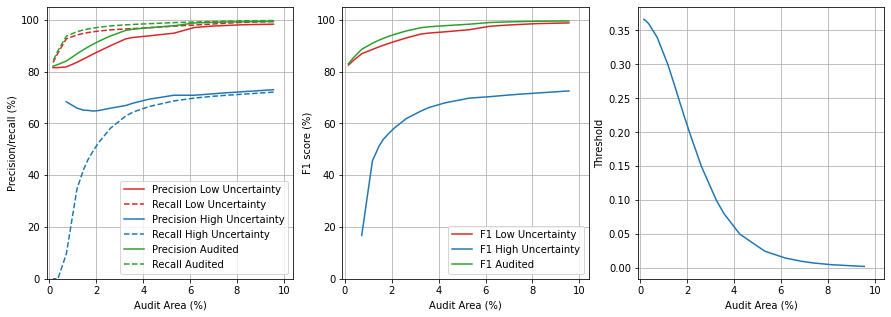

In [10]:
trainer.plotUncertaintyAA()

In [11]:
trainer.getUncertaintyToShow()

ic| trainer.dataset.previewLims1: array([11500, 12500,  9000, 10000])
    trainer.dataset.previewLims2: array([ 5000,  6000,  9500, 10500])
ic| np.unique(trainer.mask_amazon_ts[lims[0]:lims[1], lims[2]:lims[3]]): array([1], dtype=uint8)
ic| np.unique(trainer.mask_amazon_ts[lims[0]:lims[1], lims[2]:lims[3]], return_counts=True): (array([1], dtype=uint8), array([920000], dtype=int64))


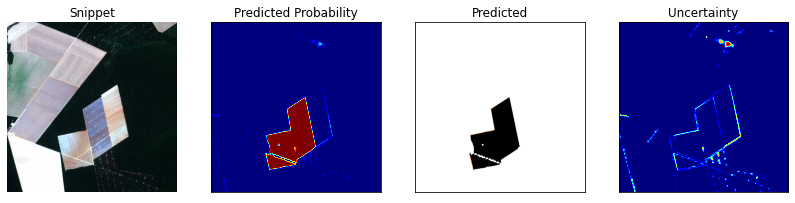

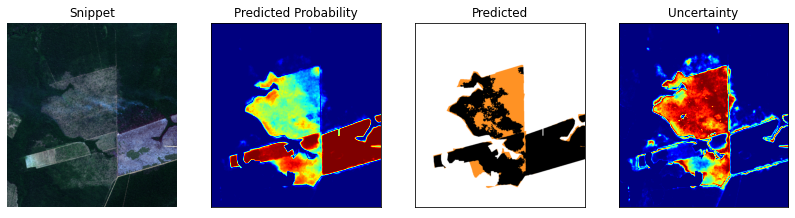

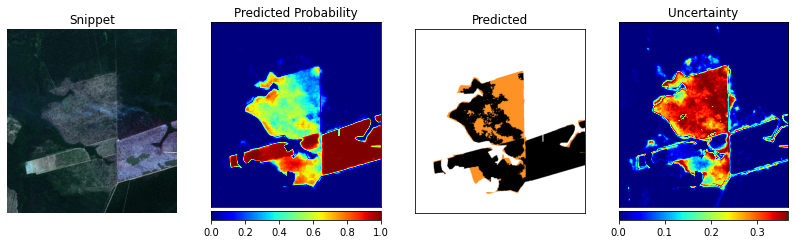

In [12]:
trainer.logger.plotCropSample(trainer)